<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [5]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [6]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['emma.jpg', 'einstein.png', 'daisy.jpg', 'spider.png', 'jeniffer.jpg', 'highlights_and_shadows.jpg', 'shells.tif', 'brain_proton_density_slice.png', 'a1q5images']


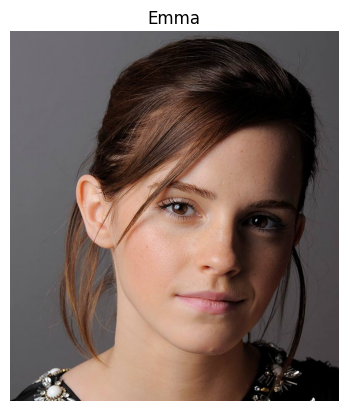

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()


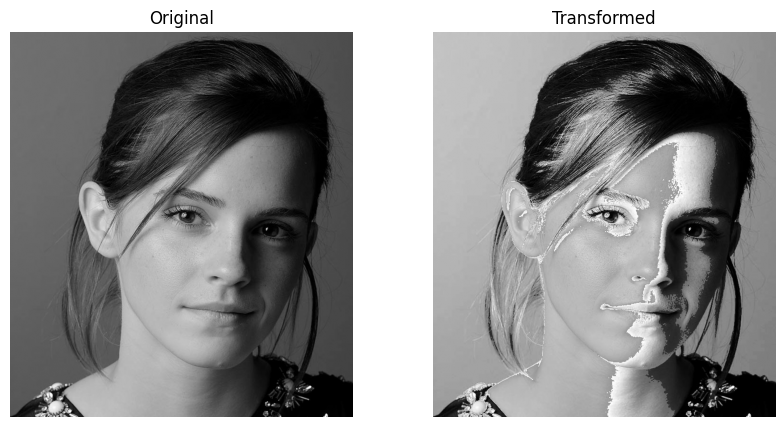

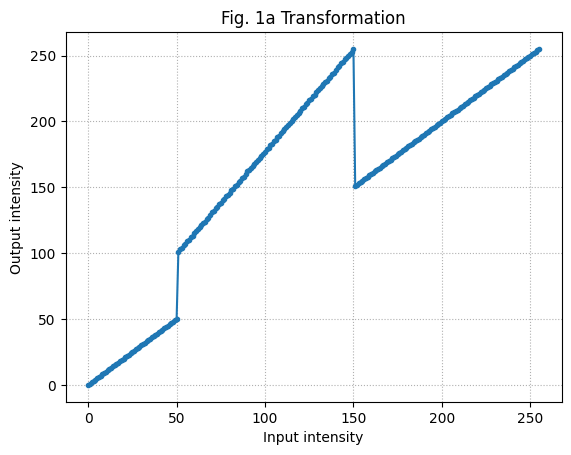

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
f = cv.imread('images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.arange(0, 51)
t2 = np.linspace(100, 255, 101)
t3 = np.arange(150, 256)

# Concatenate into one mapping table and Remove duplicate points at the joins (50 and 150)
T = np.concatenate((t1, t2[1:], t3[1:])).astype(np.uint8)


# Apply transformation

g = T[f]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(f, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(g, cmap='gray'); plt.title('Transformed'); plt.axis('off')
plt.show()

# Plot transformation function
plt.plot(np.arange(256), T, '-o', markersize=3)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Fig. 1a Transformation")
plt.grid(True, ls=":")
plt.show()

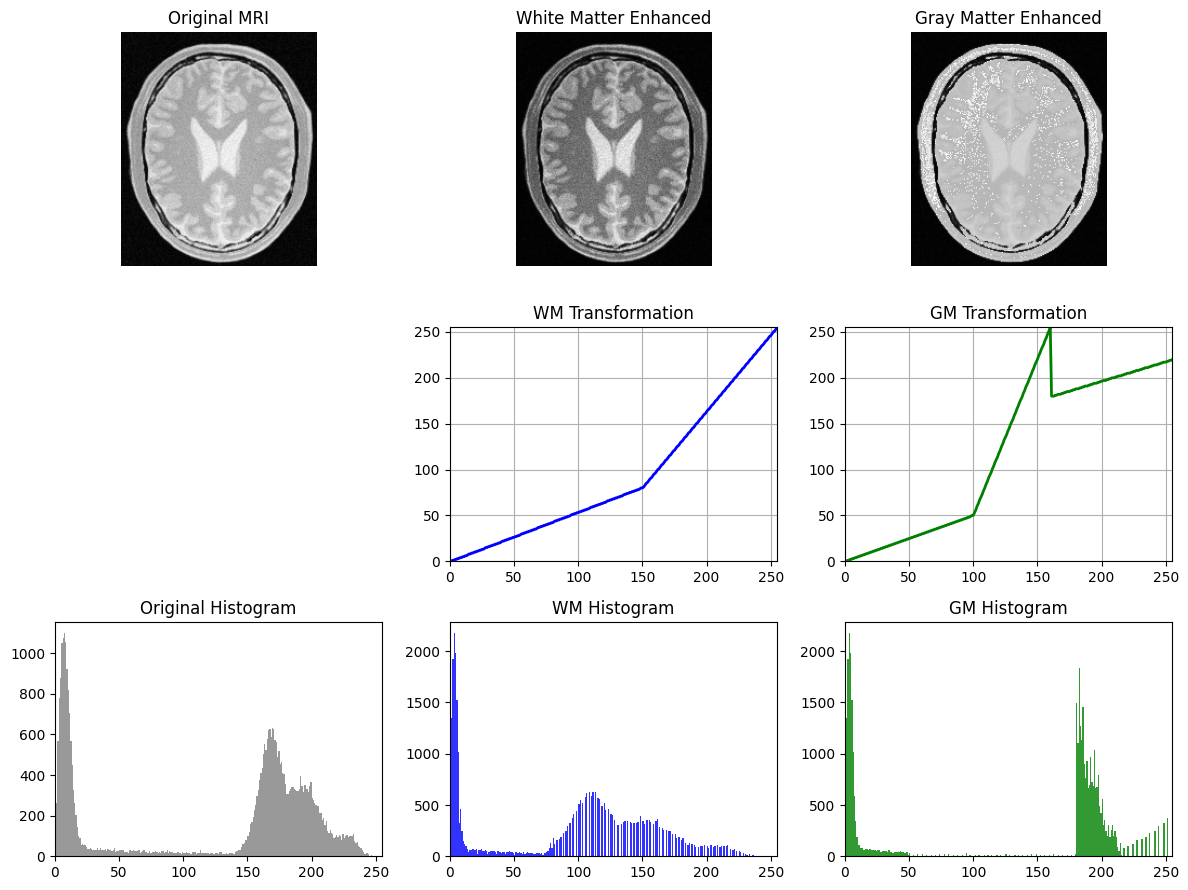

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read MRI in grayscale
img = cv2.imread("images/a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
x = np.arange(256)

# White matter intensity range
white_low, white_high = 150, 255
lut_white = np.zeros_like(x, dtype=np.uint8)
lut_white[:white_low] = np.linspace(0, 80, white_low)  # compress dark pixels
lut_white[white_low:white_high+1] = np.linspace(80, 255, white_high - white_low + 1)  # stretch WM
lut_white[white_high+1:] = 255  # saturate brightest pixels

# Gray matter intensity range
gray_low, gray_high = 100, 160
lut_gray = np.zeros_like(x, dtype=np.uint8)
lut_gray[:gray_low] = np.linspace(0, 50, gray_low)  # compress darker pixels
lut_gray[gray_low:gray_high+1] = np.linspace(50, 255, gray_high - gray_low + 1)  # stretch GM
lut_gray[gray_high+1:] = np.linspace(180, 220, 255 - gray_high)  # keep WM/CSF dim

# Apply transformations
white_enhanced = cv2.LUT(img, lut_white)
gray_enhanced = cv2.LUT(img, lut_gray)

# --- Plot images, transformation functions, and histograms ---
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Images
axes[0,0].imshow(img, cmap='gray'); axes[0,0].set_title("Original MRI"); axes[0,0].axis('off')
axes[0,1].imshow(white_enhanced, cmap='gray'); axes[0,1].set_title("White Matter Enhanced"); axes[0,1].axis('off')
axes[0,2].imshow(gray_enhanced, cmap='gray'); axes[0,2].set_title("Gray Matter Enhanced"); axes[0,2].axis('off')

# Transformation functions
axes[1,0].axis('off')  # empty
axes[1,1].plot(x, lut_white, color="blue", lw=2); axes[1,1].set_title("WM Transformation")
axes[1,1].set_xlim(0,255); axes[1,1].set_ylim(0,255); axes[1,1].grid(True)
axes[1,2].plot(x, lut_gray, color="green", lw=2); axes[1,2].set_title("GM Transformation")
axes[1,2].set_xlim(0,255); axes[1,2].set_ylim(0,255); axes[1,2].grid(True)

# Histograms
bins = np.arange(257)
axes[2,0].hist(img.ravel(), bins=bins, color="gray", alpha=0.8)
axes[2,0].set_title("Original Histogram"); axes[2,0].set_xlim(0,255)

axes[2,1].hist(white_enhanced.ravel(), bins=bins, color="blue", alpha=0.8)
axes[2,1].set_title("WM Histogram"); axes[2,1].set_xlim(0,255)

axes[2,2].hist(gray_enhanced.ravel(), bins=bins, color="green", alpha=0.8)
axes[2,2].set_title("GM Histogram"); axes[2,2].set_xlim(0,255)

plt.tight_layout()
plt.show()


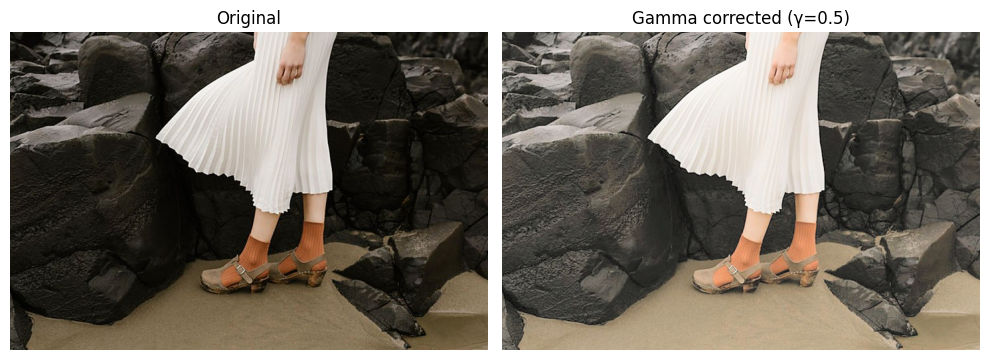

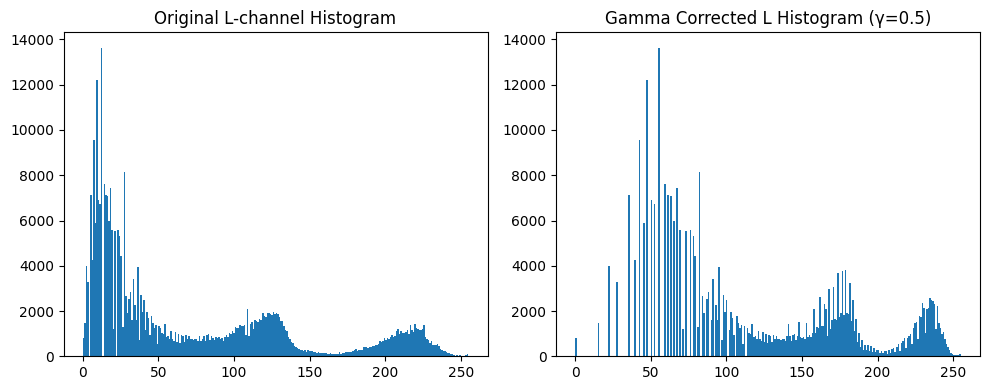

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("images/a1images/highlights_and_shadows.jpg")
if img is None:
    raise FileNotFoundError("Check the file path")

# Convert to Lab
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

# Gamma value (<1 brightens, >1 darkens)
gamma = 0.5

# Build gamma LUT (0–255 input → gamma corrected output)
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(256)], dtype=np.uint8)

# Apply to L channel
L_gamma = cv2.LUT(L, t)

# Merge back and convert to BGR
lab_gamma = cv2.merge((L_gamma, a, b))
img_gamma = cv2.cvtColor(lab_gamma, cv2.COLOR_Lab2BGR)

# Show original and corrected
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
plt.title(f"Gamma corrected (γ={gamma})")
plt.axis("off")
plt.tight_layout()
plt.show()

# Show histograms separately
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(L.ravel(), bins=256, range=(0,255))
plt.title("Original L-channel Histogram")
plt.subplot(1,2,2)
plt.hist(L_gamma.ravel(), bins=256, range=(0,255))
plt.title(f"Gamma Corrected L Histogram (γ={gamma})")
plt.tight_layout()
plt.show()


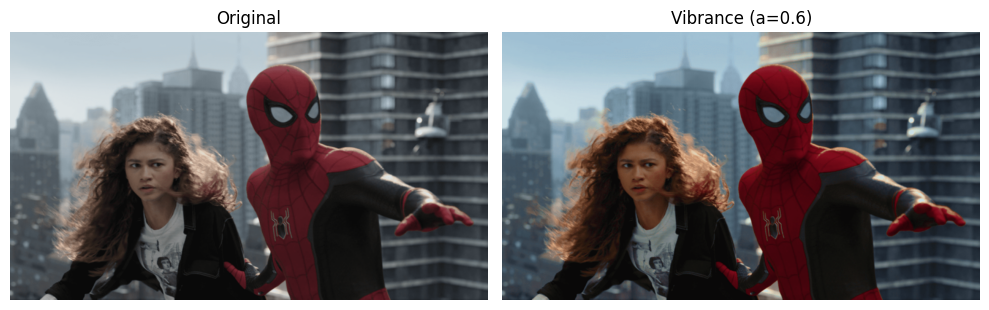

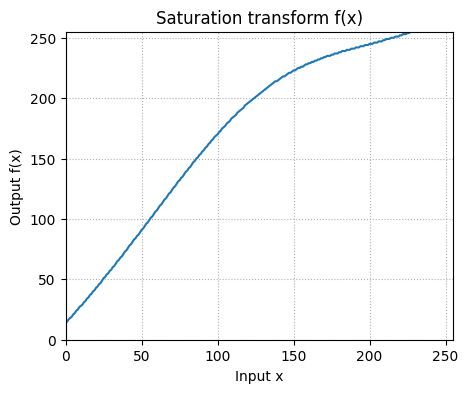

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- load image ---
img = cv2.imread("images/a1images/spider.png")
if img is None:
    raise FileNotFoundError("Check image path")

# --- HSV split ---
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)              # each is 0..255 (uint8)

# --- vibrance transform on S (given in the question) ---
sigma = 70.0
a = 0.6                                # tweak in [0,1] until it looks nice; report this value

x = np.arange(256, dtype=np.float32)   # input intensities 0..255
f = x + a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2 * sigma ** 2))
lut = np.clip(f, 0, 255).astype(np.uint8)   # min(…, 255)

S_enh = cv2.LUT(S, lut)                # apply to saturation plane

# --- recombine & back to BGR for display ---
hsv_enh = cv2.merge((H, S_enh, V))
img_enh = cv2.cvtColor(hsv_enh, cv2.COLOR_HSV2BGR)

# --- show original vs vibrance-enhanced ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(img_enh, cv2.COLOR_BGR2RGB)); plt.title(f"Vibrance (a={a})"); plt.axis("off")
plt.tight_layout(); plt.show()

# --- show intensity transformation (f(x)) ---
plt.figure(figsize=(5,4))
plt.plot(x, lut)
plt.title("Saturation transform f(x)")
plt.xlabel("Input x"); plt.ylabel("Output f(x)")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True, ls=":")
plt.show()


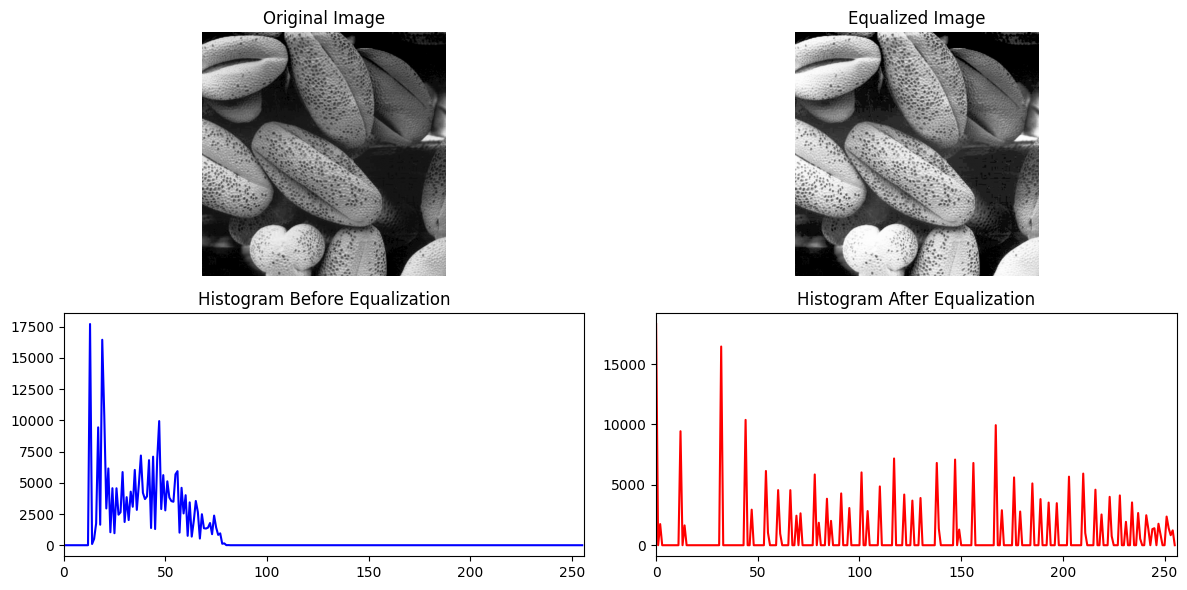

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def my_hist_equalization(img):
    # Flatten image
    hist, bins = np.histogram(img.flatten(), 256, [0,256])

    # Cumulative Distribution Function
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Mask zeros to avoid division errors
    cdf_m = np.ma.masked_equal(cdf, 0)

    # Equalization formula
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Map the original image pixels using cdf
    img_eq = cdf[img]

    return img_eq, hist, np.histogram(img_eq.flatten(), 256, [0,256])[0]

# Load grayscale image
img = cv2.imread("images/a1images/shells.tif", cv2.IMREAD_GRAYSCALE)

# Apply custom histogram equalization
img_eq, hist_before, hist_after = my_hist_equalization(img)

# Display images
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.plot(hist_before, color='blue')
plt.title("Histogram Before Equalization")
plt.xlim([0,256])

plt.subplot(2,2,4)
plt.plot(hist_after, color='red')
plt.title("Histogram After Equalization")
plt.xlim([0,256])

plt.tight_layout()
plt.show()
